<a href="https://colab.research.google.com/github/Codingwithkings/Vending-Machine/blob/main/Mid_Term_Vending_Machine_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Vending Machine Sales

1.   List item

1.   List item
2.   List item


2.   List item



## Task


Uncover the factors that lead to employee attrition.

1. Have a look at the variables, understand what they are.
2. Which variables are associated with Vending Machine Sales?  Formulate several hypotheses.
3. Explore each hypothesis.
    - Make plots and/or compute statistics.
    - Write a short conclusion, refer to the justifications you found in the data.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("awesomeasingh/vending-machine-sales")

print("Path to dataset files:", path)



100%|██████████| 147k/147k [00:00<00:00, 58.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/awesomeasingh/vending-machine-sales/versions/5


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os
os.listdir(path)


['vending_machine_sales.csv']

In [ ]:
file_path = os.path.join(path,'vending_machine_sales.csv' )
file_path

'/root/.cache/kagglehub/datasets/awesomeasingh/vending-machine-sales/versions/5/vending_machine_sales.csv'

In [ ]:
vending_machine= pd.read_csv(file_path)
vending_machine

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9612,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,Doritos Nacho Cheese,Food,16175373362,12/30/2022,Cash,112,1.5,1,112,1.5,1,1.5,1.5,12/30/2022
9613,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Poland Springs Water,Water,16176802941,12/31/2022,Cash,143,1.5,1,143,1.5,1,1.5,1.5,12/31/2022
9614,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,Robert Irvine's - Fit Crunch - Chocolate Pea,Food,16176909481,12/31/2022,Cash,137,2.0,1,137,2.0,1,2.0,2.0,12/31/2022
9615,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Poland Springs Water,Water,16176914301,12/31/2022,Cash,143,1.5,1,143,1.5,1,1.5,1.5,12/31/2022


In [ ]:
vending_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9617 entries, 0 to 9616
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Status       9617 non-null   object 
 1   Device ID    9617 non-null   object 
 2   Location     9617 non-null   object 
 3   Machine      9617 non-null   object 
 4   Product      9611 non-null   object 
 5   Category     9350 non-null   object 
 6   Transaction  9617 non-null   int64  
 7   TransDate    9617 non-null   object 
 8   Type         9617 non-null   object 
 9   RCoil        9617 non-null   int64  
 10  RPrice       9617 non-null   float64
 11  RQty         9617 non-null   int64  
 12  MCoil        9617 non-null   int64  
 13  MPrice       9614 non-null   float64
 14  MQty         9617 non-null   int64  
 15  LineTotal    9617 non-null   float64
 16  TransTotal   9617 non-null   float64
 17  Prcd Date    9617 non-null   object 
dtypes: float64(4), int64(5), object(9)
memory usage:

In [ ]:
# see all the null rolls
null_mask = vending_machine.isnull().any(axis=1)
null_rows = vending_machine[null_mask]
print(null_rows)

         Status    Device ID           Location                  Machine  \
1232  Processed  VJ300320692  EB Public Library  EB Public Library x1380   
1431  Processed  VJ300320692  EB Public Library  EB Public Library x1380   
1439  Processed  VJ300320692  EB Public Library  EB Public Library x1380   
1448  Processed  VJ300320609        GuttenPlans        GuttenPlans x1367   
1453  Processed  VJ300320609        GuttenPlans        GuttenPlans x1367   
...         ...          ...                ...                      ...   
9360  Processed  VJ300320692  EB Public Library  EB Public Library x1380   
9361  Processed  VJ300320692  EB Public Library  EB Public Library x1380   
9415  Processed  VJ300320692  EB Public Library  EB Public Library x1380   
9419  Processed  VJ300320611  Brunswick Sq Mall     BSQ Mall x1366 - ATT   
9587  Processed  VJ300320692  EB Public Library  EB Public Library x1380   

                                   Product Category  Transaction   TransDate  \
1232   

In [ ]:
#saw that the null-values had over 267 rolls so used
not_null_mask =vending_machine.notnull().all(axis=1)
not_null_rows_vending = vending_machine[not_null_mask]

print(not_null_rows_vending)

         Status    Device ID           Location                 Machine  \
0     Processed  VJ300320611  Brunswick Sq Mall    BSQ Mall x1366 - ATT   
1     Processed  VJ300320611  Brunswick Sq Mall    BSQ Mall x1366 - ATT   
2     Processed  VJ300320611  Brunswick Sq Mall    BSQ Mall x1366 - ATT   
3     Processed  VJ300320611  Brunswick Sq Mall    BSQ Mall x1366 - ATT   
4     Processed  VJ300320611  Brunswick Sq Mall    BSQ Mall x1366 - ATT   
...         ...          ...                ...                     ...   
9612  Processed  VJ300320609        GuttenPlans       GuttenPlans x1367   
9613  Processed  VJ300320611  Brunswick Sq Mall    BSQ Mall x1366 - ATT   
9614  Processed  VJ300205292  Brunswick Sq Mall  BSQ Mall x1364 - Zales   
9615  Processed  VJ300320611  Brunswick Sq Mall    BSQ Mall x1366 - ATT   
9616  Processed  VJ300205292  Brunswick Sq Mall  BSQ Mall x1364 - Zales   

                                            Product    Category  Transaction  \
0              Red 

## Dataset

_Source: https://www.kaggle.com/datasets/awesomeasingh/vending-machine-sales/code

_Check this other site for additional documentation about the variables: https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors/data_

This is a fictional data set created by IBM data scientists. It contains data about employees in a company.

Encoding of some of the columns:
This file has the following attributes

Status : Represents if the machine data is successfully processed
Device ID : Unique electronic identifier ( also called as ePort) for the vending machine. A machine is allocated a unique ePrt * device
Location : Indicates location of the vending machine
Machine : User-friendly machine name
Product : Product vended from the machine
Category : Carbonated / Food / Non-carbonated / Water
Transaction : Unique identifier for every transaction
TransDate : The Date & time of transaction
Type : Type of transaction ( Cash / Credit )
RCoil : Coil # used to vend the product
RPrice : Price of the Product
RQty : Quantity sold. This is usually one but machines can be configured to sell more items in a single transaction
MCoil : Mapped coil # used to vend the product ( from toucan )
MPrice : Mapped price of the Product
MQty : Mapped quantity sold. This is usually one but machines can be configured to sell more items in a single transaction
LineTotal : Total sale per transaction
TransTotal : Represents total of all transactions that will show up on the Credit Card. A user could vend a drink for $3 and a snack for $1.5 making a total of $4.50
Prcd Date : Date when the transaction was processed by SeedLive ( an entity that is used to aggregate all transactions electronically )
```

In [ ]:
# Encoding

df_with_dummies = pd.get_dummies(not_null_rows_vending)
df_with_dummies

,Transaction,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Status_Processed,...,Prcd Date_9/28/2022,Prcd Date_9/29/2022,Prcd Date_9/3/2022,Prcd Date_9/30/2022,Prcd Date_9/4/2022,Prcd Date_9/5/2022,Prcd Date_9/6/2022,Prcd Date_9/7/2022,Prcd Date_9/8/2022,Prcd Date_9/9/2022
0,14515778905,148,3.5,1,148,3.5,1,3.5,3.5,True,...,False,False,False,False,False,False,False,False,False,False
1,14516018629,148,3.5,1,148,3.5,1,3.5,5.0,True,...,False,False,False,False,False,False,False,False,False,False
2,14516018629,123,1.5,1,123,1.5,1,1.5,5.0,True,...,False,False,False,False,False,False,False,False,False,False
3,14516020373,123,1.5,1,123,1.5,1,1.5,1.5,True,...,False,False,False,False,False,False,False,False,False,False
4,14516021756,148,3.5,1,148,3.5,1,3.5,3.5,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9612,16175373362,112,1.5,1,112,1.5,1,1.5,1.5,True,...,False,False,False,False,False,False,False,False,False,False
9613,16176802941,143,1.5,1,143,1.5,1,1.5,1.5,True,...,False,False,False,False,False,False,False,False,False,False
9614,16176909481,137,2.0,1,137,2.0,1,2.0,2.0,True,...,False,False,False,False,False,False,False,False,False,False
9615,16176914301,143,1.5,1,143,1.5,1,1.5,1.5,True,...,False,False,False,False,False,False,False,False,False,False


## Analysis

In [ ]:
not_null_rows_vending.columns

Index(['Status', 'Device ID', 'Location', 'Machine', 'Product', 'Category',
       'Transaction', 'TransDate', 'Type', 'RCoil', 'RPrice', 'RQty', 'MCoil',
       'MPrice', 'MQty', 'LineTotal', 'TransTotal', 'Prcd Date'],
      dtype='object')

In [ ]:
not_null_rows_vending.dtypes

,0
Status,object
Device ID,object
Location,object
Machine,object
Product,object
Category,object
Transaction,int64
TransDate,object
Type,object
RCoil,int64


In [ ]:
not_null_rows_vending.Machine.unique()

array(['BSQ Mall x1366 - ATT', 'BSQ Mall x1364 - Zales',
       'Earle Asphalt x1371', 'GuttenPlans x1367',
       'EB Public Library x1380'], dtype=object)

In [ ]:
vending_machine_subset =not_null_rows_vending[['Machine','Type', 'RPrice','RQty', 'MPrice']]
vending_machine_subset

,Machine,Type,RPrice,RQty,MPrice
0,BSQ Mall x1366 - ATT,Credit,3.5,1,3.5
1,BSQ Mall x1366 - ATT,Credit,3.5,1,3.5
2,BSQ Mall x1366 - ATT,Credit,1.5,1,1.5
3,BSQ Mall x1366 - ATT,Credit,1.5,1,1.5
4,BSQ Mall x1366 - ATT,Credit,3.5,1,3.5
...,...,...,...,...,...
9612,GuttenPlans x1367,Cash,1.5,1,1.5
9613,BSQ Mall x1366 - ATT,Cash,1.5,1,1.5
9614,BSQ Mall x1364 - Zales,Cash,2.0,1,2.0
9615,BSQ Mall x1366 - ATT,Cash,1.5,1,1.5


In [ ]:
not_null_rows_vending.RPrice.sum()

np.float64(18092.5)

In [ ]:
#The Price of the product(RPrice) is the price Mapped Price at the vending Machine(MPrice)

In [ ]:
not_null_rows_vending.MPrice.sum()

np.float64(18092.5)

In [ ]:
vending_machine.head(20)

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,3.50,1,148,3.50,1,3.50,3.50,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,148,3.50,1,148,3.50,1,3.50,5.00,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,123,1.50,1,123,1.50,1,1.50,5.00,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,1/1/2022,Credit,123,1.50,1,123,1.50,1,1.50,1.50,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,1/1/2022,Credit,148,3.50,1,148,3.50,1,3.50,3.50,1/1/2022
5,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,Bai Antioxidant - Brasilia BB,Non Carbonated,14517568743,1/2/2022,Cash,146,2.50,1,146,2.50,1,2.50,2.50,1/2/2022
6,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,Miss Vickie's Potato Chip - Sea Salt & Vinega,Food,14518731524,1/3/2022,Cash,114,1.50,1,114,1.50,1,1.50,1.50,1/2/2022
7,Processed,VJ300320686,Earle Asphalt,Earle Asphalt x1371,Miss Vickie's Potato Chip - Lime & Cracked Pe,Food,14519162059,1/3/2022,Credit,110,1.50,1,110,1.50,1,1.50,1.50,1/3/2022
8,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,Monster Energy Original,Carbonated,14519670154,1/3/2022,Credit,144,3.00,1,144,3.00,1,3.00,3.00,1/3/2022
9,Processed,VJ300320686,Earle Asphalt,Earle Asphalt x1371,Seapoint Farms Dry Roasted Edamame - Wasabi,Food,14520315330,1/3/2022,Credit,134,2.50,1,134,2.50,1,2.50,2.50,1/3/2022


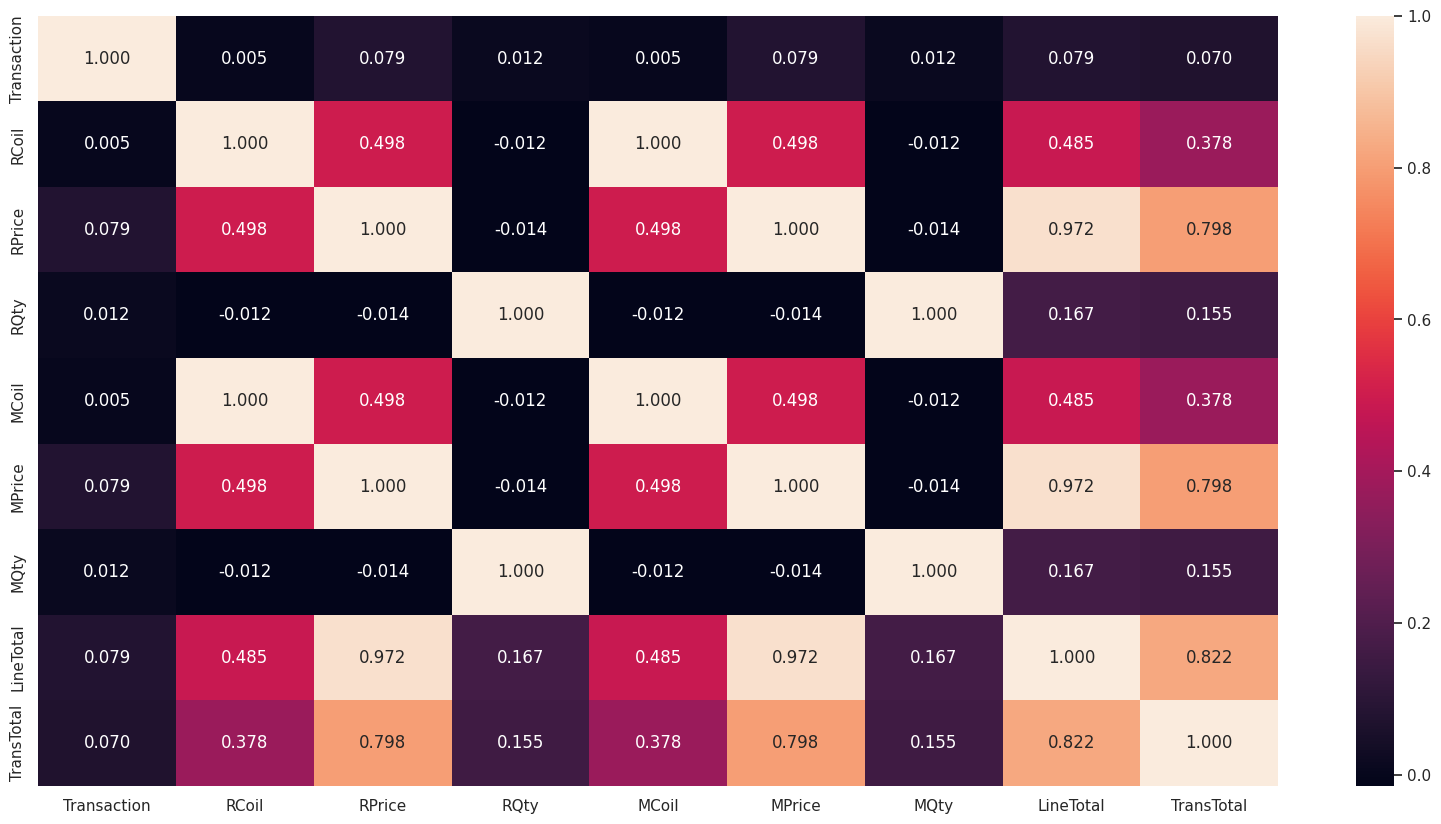

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))
df_subset_non_string = not_null_rows_vending.select_dtypes(exclude="object")
# df_subset_numeric_only = df.select_dtypes(include="number") # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
sns.heatmap(df_subset_non_string.corr(method="kendall"), annot=True, fmt=".3f", ax=ax);

In [ ]:
# Correlation Coeficient Range [-1 - 1]

#-1 is perfectly negative Correlation
#1 is perfect positive correlation


<Axes: xlabel='MPrice', ylabel='LineTotal'>

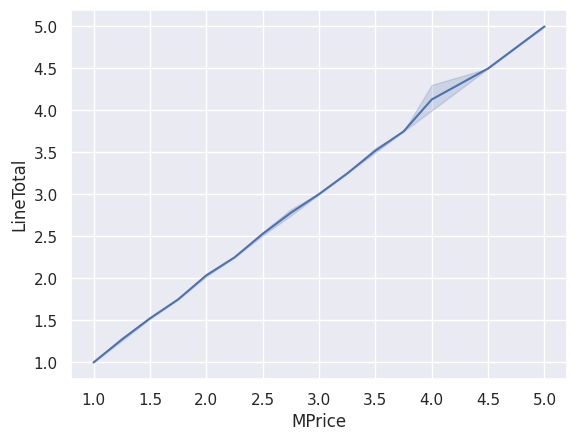

In [ ]:
#Looking at the Correlation between MPrice and line Total at 0.972
# Example Hypothosis 1: The higher the Price the higher the Total sale per Transaction
sns.lineplot(not_null_rows_vending, x = 'MPrice', y = 'LineTotal')

In [ ]:
#Hypothesis 1 is correct

In [ ]:

#Question 2  : what is the price of  most category of the items sold and what item is the best seller
not_null_rows_vending.groupby('Product')[['MQty']].sum().sort_values(by='MQty', ascending=False)

,MQty
Product,
Coca Cola - Zero Sugar,661
Monster Energy Original,516
Poland Springs Water,457
Coca Cola - Regular,353
Sunkist Soda - Orange,290
...,...
Nature's Valley Chewy Granola Bar - Fruit & N,1
Larabar - Peanut Butter chocolate Chip,1
Orchard Bar - Cranberry Orange & Walnut,1


In [ ]:
#best seller is Coca Cola - Zero Sugar

In [ ]:
#Which Machine sels the most amount of Products
not_null_rows_vending.groupby('Machine')[['MQty']].sum().sort_values(by='MQty', ascending=False)

,MQty
Machine,
GuttenPlans x1367,3627
EB Public Library x1380,3098
Earle Asphalt x1371,1030
BSQ Mall x1364 - Zales,959
BSQ Mall x1366 - ATT,767


<Axes: xlabel='Machine', ylabel='MPrice'>

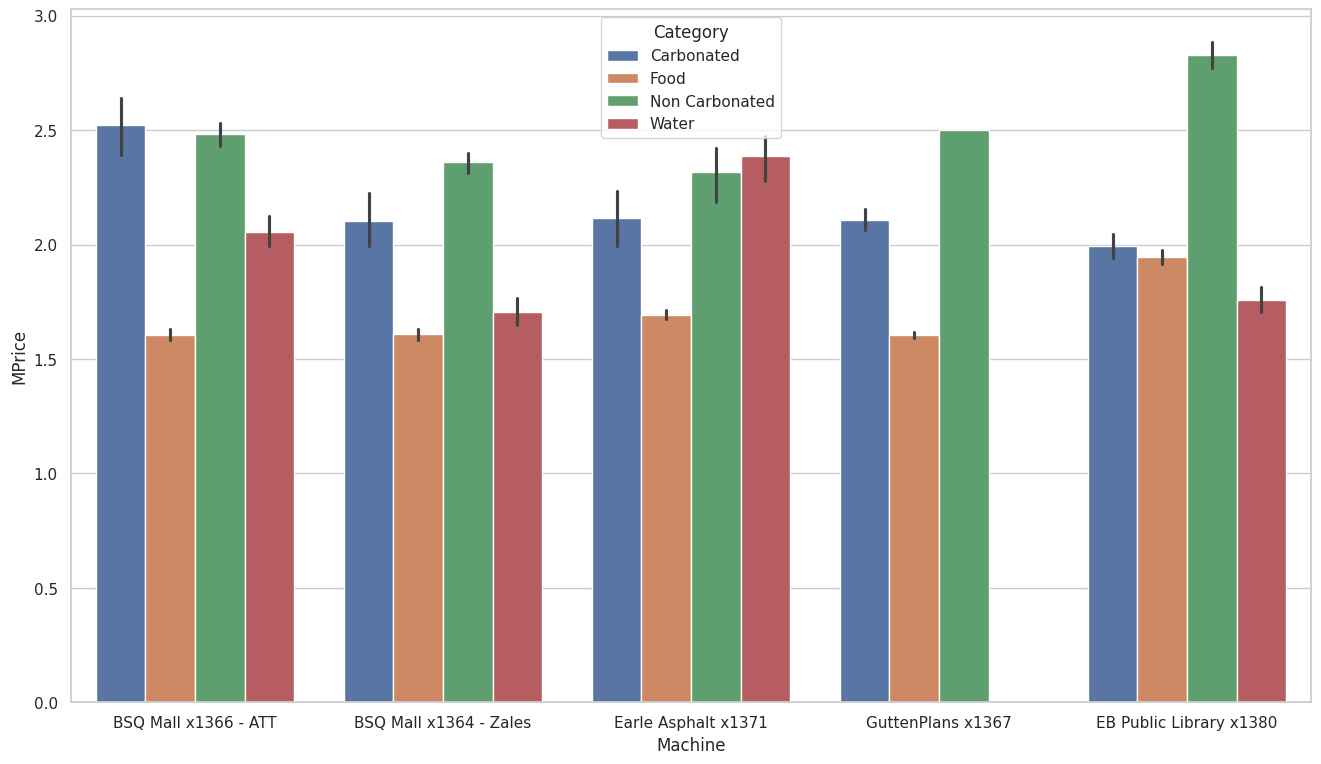

In [ ]:
#the graph shows that Carbonated drinks are the best seller on average  with EB Public Library
sns.barplot(data=not_null_rows_vending, x='Machine', y='MPrice', hue='Category')

<Axes: xlabel='MPrice', ylabel='Count'>

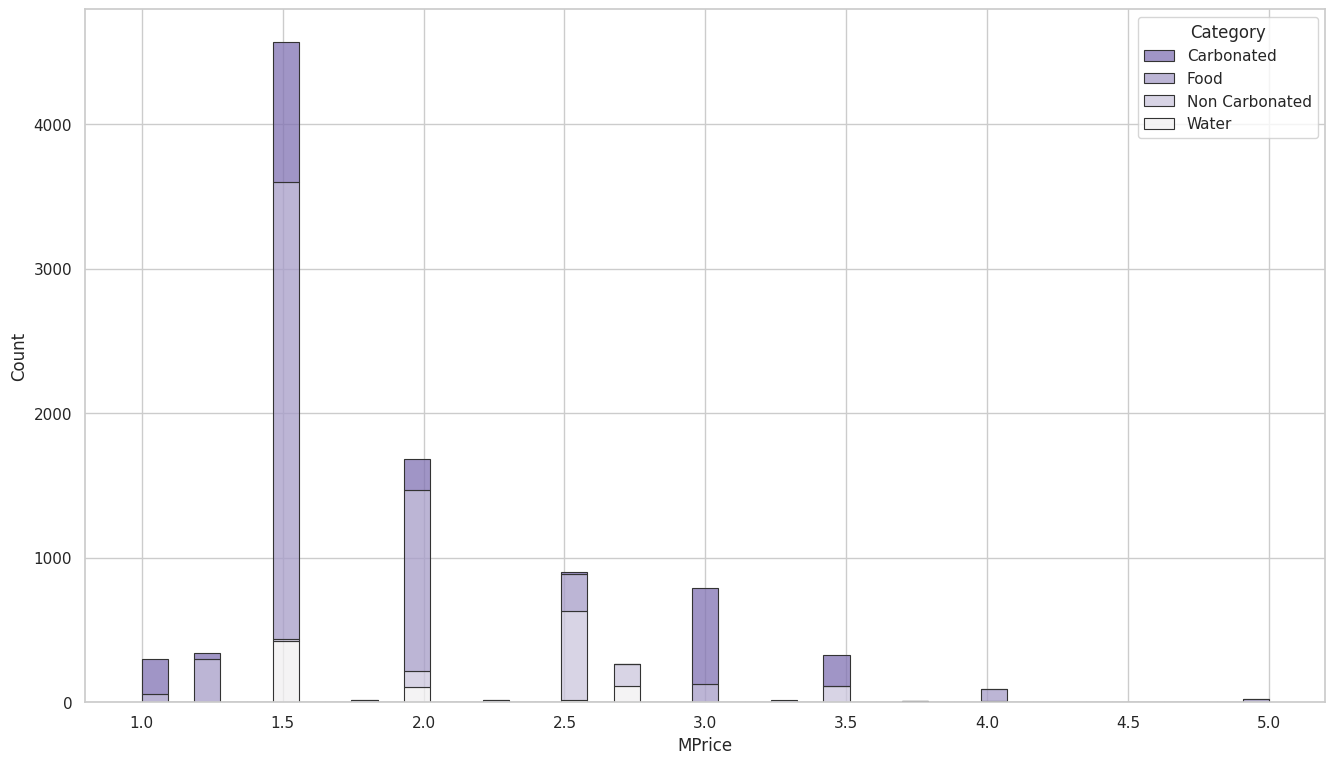

In [ ]:

sns.histplot(
    not_null_rows_vending,
    x="MPrice", hue="Category",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".2",
    linewidth=.8,

)

Most items cost 1.5 $
   
*italicized text*



In [ ]:
# assuming that most Cabonated drinks cost 1.5$ because the highest selling items are carbonated drinks with Coca cola at the top
not_null_rows_vending.groupby('Category')[['MPrice']].mean()

,MPrice
Category,
Carbonated,2.110433
Food,1.741734
Non Carbonated,2.600196
Water,1.821918


In [ ]:
not_null_rows_vending[not_null_rows_vending['Product'] == 'Coca Cola - Zero Sugar']

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date,Month
112,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,Coca Cola - Zero Sugar,Carbonated,14564514322,1/13/2022,Cash,142,1.0,1,142,1.0,1,1.0,1.0,2022-01-13,2022-01
120,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,Coca Cola - Zero Sugar,Carbonated,14564967520,1/13/2022,Cash,141,1.0,1,141,1.0,1,1.0,1.0,2022-01-13,2022-01
121,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,Coca Cola - Zero Sugar,Carbonated,14565053127,1/13/2022,Cash,142,1.0,1,142,1.0,1,1.0,1.0,2022-01-13,2022-01
123,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,Coca Cola - Zero Sugar,Carbonated,14565335876,1/14/2022,Cash,141,1.0,1,141,1.0,1,1.0,1.0,2022-01-14,2022-01
140,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,Coca Cola - Zero Sugar,Carbonated,14568646555,1/14/2022,Cash,141,1.0,1,141,1.0,1,1.0,1.0,2022-01-14,2022-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9583,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Coca Cola - Zero Sugar,Carbonated,16172358903,12/30/2022,Cash,141,2.0,1,141,2.0,1,2.0,2.0,2022-12-30,2022-12
9590,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Coca Cola - Zero Sugar,Carbonated,16173493586,12/30/2022,Credit,141,2.0,1,141,2.0,1,2.0,4.0,2022-12-30,2022-12
9596,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Coca Cola - Zero Sugar,Carbonated,16173863932,12/30/2022,Credit,141,2.0,1,141,2.0,1,2.0,2.0,2022-12-30,2022-12
9602,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Coca Cola - Zero Sugar,Carbonated,16174167366,12/30/2022,Credit,141,2.0,1,141,2.0,1,2.0,2.0,2022-12-30,2022-12


In [ ]:
#Finding out that the price of products change through out the year making the average price schift

In [ ]:


# Assuming df is your DataFrame and 'date_column' is the column with dates
#not_null_rows_vending['Prcd Date'] = pd.to_datetime(not_null_rows_vending['Prcd Date'])
grouped_date = not_null_rows_vending.groupby(pd.Grouper(key='Prcd Date', freq='ME')).sum()
grouped_date

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal
Prcd Date,,,,,,,,,,,,,,,,,
2022-01-31,ProcessedProcessedProcessedProcessedProcessedP...,VJ300320611VJ300320611VJ300320611VJ300320611VJ...,Brunswick Sq MallBrunswick Sq MallBrunswick Sq...,BSQ Mall x1366 - ATTBSQ Mall x1366 - ATTBSQ Ma...,Red Bull - Energy Drink - Sugar FreeRed Bull -...,CarbonatedCarbonatedFoodFoodCarbonatedNon Carb...,7058869171458,1/1/20221/1/20221/1/20221/1/20221/1/20221/2/20...,CreditCreditCreditCreditCreditCashCashCreditCr...,63814,872.00,493,63814,872.00,493,887.00,954.25
2022-02-28,ProcessedProcessedProcessedProcessedProcessedP...,VJ300320609VJ300320609VJ300320609VJ300320609VJ...,GuttenPlansGuttenPlansGuttenPlansGuttenPlansGu...,GuttenPlans x1367GuttenPlans x1367GuttenPlans ...,Coca Cola - Zero SugarCoca Cola - Zero SugarJa...,CarbonatedCarbonatedFoodFoodFoodFoodFoodFoodNo...,7216398421528,2/1/20222/1/20222/1/20222/1/20222/1/20222/1/20...,CashCashCreditCreditCreditCashCashCashCashCash...,65340,887.00,502,65340,887.00,502,906.75,1048.50
2022-03-31,ProcessedProcessedProcessedProcessedProcessedP...,VJ300320609VJ300320609VJ300320609VJ300320609VJ...,GuttenPlansGuttenPlansGuttenPlansGuttenPlansEa...,GuttenPlans x1367GuttenPlans x1367GuttenPlans ...,Sunkist Soda - OrangeFritos - OriginalChesters...,CarbonatedFoodFoodCarbonatedFoodFoodCarbonated...,9216320977994,3/1/20223/1/20223/1/20223/1/20223/1/20223/1/20...,CashCreditCreditCreditCashCashCashCashCashCash...,81277,1100.75,632,81277,1100.75,632,1118.00,1314.25
2022-04-30,ProcessedProcessedProcessedProcessedProcessedP...,VJ300320611VJ300320686VJ300320609VJ300320692VJ...,Brunswick Sq MallEarle AsphaltGuttenPlansEB Pu...,BSQ Mall x1366 - ATTEarle Asphalt x1371GuttenP...,Monster Energy OriginalWonderful Pistachios - ...,CarbonatedFoodCarbonatedCarbonatedFoodNon Carb...,12913144502654,4/1/20224/1/20224/1/20224/1/20224/1/20224/1/20...,CreditCreditCashCreditCreditCreditCashCashCash...,114964,1608.00,868,114964,1608.00,868,1617.50,1785.25
2022-05-31,ProcessedProcessedProcessedProcessedProcessedP...,VJ300320692VJ300320692VJ300320692VJ300320692VJ...,EB Public LibraryEB Public LibraryEB Public Li...,EB Public Library x1380EB Public Library x1380...,Pop Corners - White CheddarPop Corners - White...,FoodFoodFoodNon CarbonatedCarbonatedFoodFoodFo...,12590894935616,5/1/20225/1/20225/1/20225/1/20225/1/20225/1/20...,CreditCashCashCreditCashCashCashCashCashCredit...,110954,1579.00,839,110954,1579.00,839,1589.00,1810.75
2022-06-30,ProcessedProcessedProcessedProcessedProcessedP...,VJ300320692VJ300205292VJ300205292VJ300205292VJ...,EB Public LibraryBrunswick Sq MallBrunswick Sq...,EB Public Library x1380BSQ Mall x1364 - ZalesB...,SunChips Multigrain - SalsaPop Corners - Sea S...,FoodFoodFoodFoodFoodFoodCarbonatedFoodFoodFood...,14130674672812,6/1/20226/1/20226/1/20226/1/20226/1/20226/1/20...,CashCashCashCashCashCreditCreditCreditCashCred...,122763,1788.50,933,122763,1788.50,933,1803.25,1944.00
2022-07-31,ProcessedProcessedProcessedProcessedProcessedP...,VJ300320609VJ300320609VJ300320609VJ300205292VJ...,GuttenPlansGuttenPlansGuttenPlansBrunswick Sq ...,GuttenPlans x1367GuttenPlans x1367GuttenPlans ...,Red Bull - OriginalMonster Energy OriginalMons...,CarbonatedCarbonatedCarbonatedCarbonatedFoodFo...,16454169358363,7/1/20227/1/20227/1/20227/1/20227/1/20227/1/20...,CreditCashCreditCreditCreditCreditCreditCredit...,143543,2111.75,1085,143543,2111.75,1085,2137.75,2370.00
2022-08-31,ProcessedProcessedProcessedProcessedProcessedP...,VJ300320609VJ300320609VJ300320609VJ300320609VJ...,GuttenPlansGuttenPlansGuttenPlansGuttenPlansGu...,GuttenPlans x1367GuttenPlans x1367GuttenPlans ...,Snapple Tea - LemonSnapple Tea - RaspberryKitK...,Non CarbonatedNon CarbonatedFoodCarbonatedCarb...,13445187569664,8/1/20228/1/20228/1/20228/1/20228/1/20228/1/20...,CreditCashCashCreditCashCashCreditCreditCredit...,115280,1727.75,879,115280,1727.75,879,1751.25,2007.75
2022-09-30,

In [ ]:
#add new column
not_null_rows_vending.insert(loc, column='grouped_date')
datanew = {'not_null_rows_vending',
        'grouped_date'}
print(datanew)

{'grouped_date', 'not_null_rows_vending'}


In [ ]:
not_null_rows_vending.loc[:, 'Month'] = not_null_rows_vending['Prcd Date'].dt.to_period('M')

monthly_group = not_null_rows_vending.groupby('Month')[['MQty']].sum()
print(monthly_group)

         MQty
Month        
2022-01   493
2022-02   502
2022-03   632
2022-04   868
2022-05   839
2022-06   933
2022-07  1085
2022-08   879
2022-09   948
2022-10   833
2022-11   772
2022-12   690
2023-01     7


<ipython-input-75-33ba67791daa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_null_rows_vending['Prcd Date'] = pd.to_datetime(not_null_rows_vending['Prcd Date'])
<ipython-input-75-33ba67791daa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_null_rows_vending['Month'] = not_null_rows_vending['Prcd Date'].dt.to_period('M')


<Axes: xlabel='Month', ylabel='MQty'>

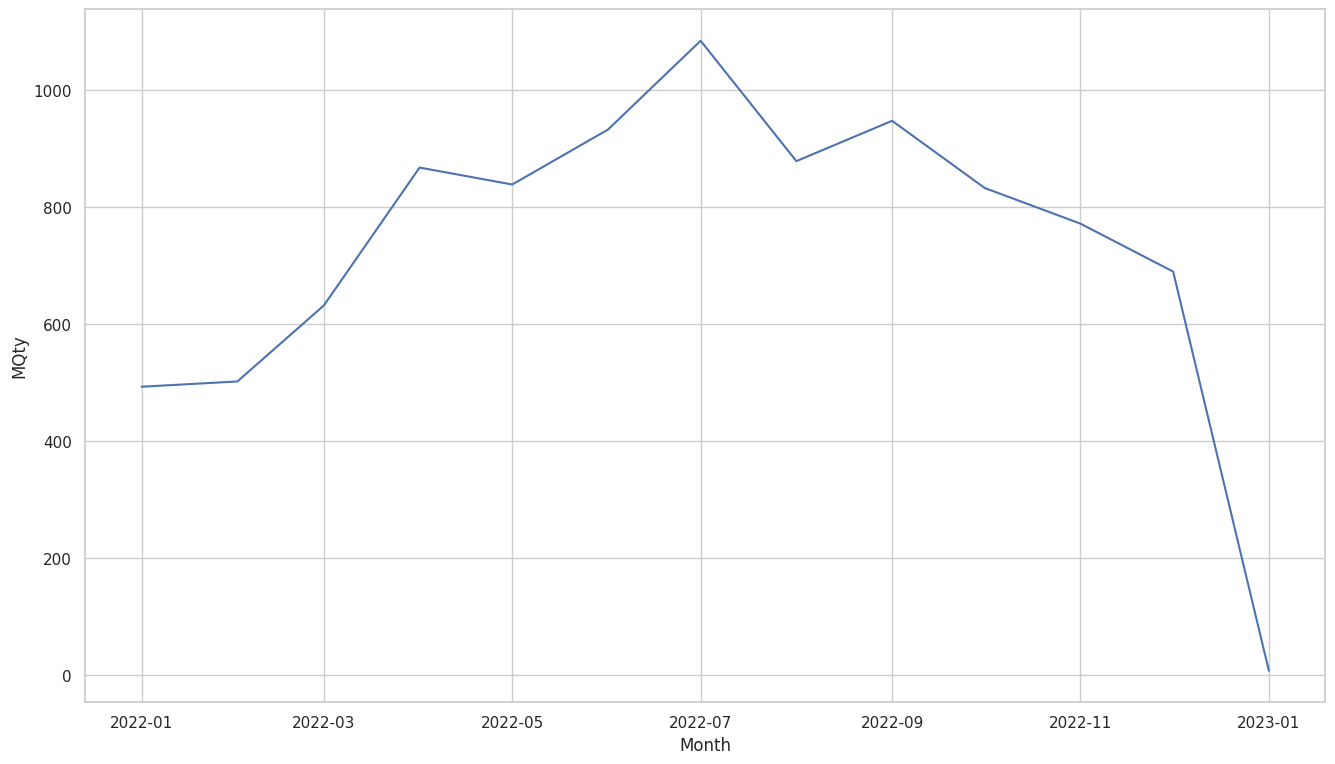

In [ ]:
#Step 1: Make sure 'Prcd Date' is datetime
not_null_rows_vending['Prcd Date'] = pd.to_datetime(not_null_rows_vending['Prcd Date'])

# Step 2: Create a new 'Month' column using .dt.to_period('M')
not_null_rows_vending['Month'] = not_null_rows_vending['Prcd Date'].dt.to_period('M')

# Step 3: Group by month and sum or count 'MQty'
monthly_group = not_null_rows_vending.groupby('Month').agg({'MQty': 'sum'}).reset_index()

# Step 4: Convert 'Month' to timestamp for plotting
monthly_group['Month'] = monthly_group['Month'].dt.to_timestamp()

# Step 5: Plot
sns.set(rc={"figure.figsize": (16, 9)}, style="whitegrid")
sns.lineplot(data=monthly_group, x='Month', y='MQty')

<Axes: xlabel='Month', ylabel='MQty'>

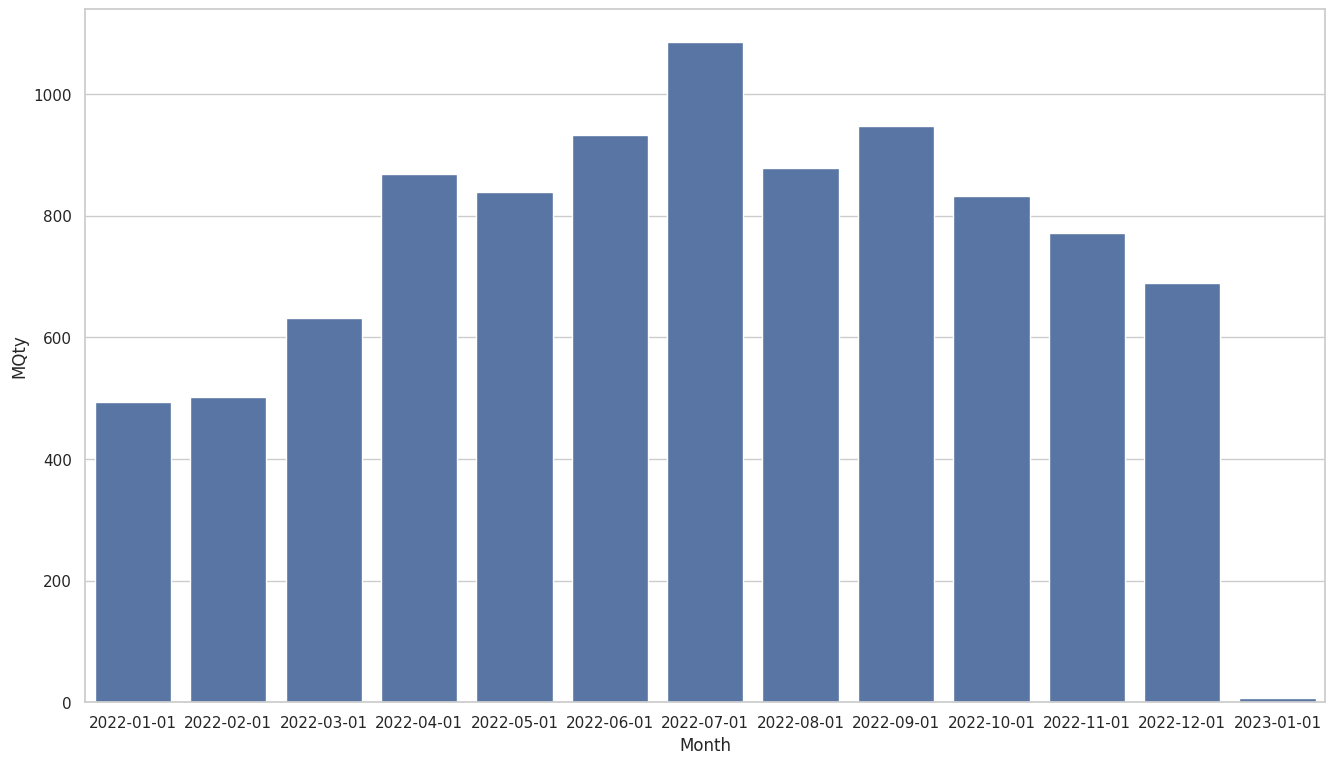

In [ ]:
sns.barplot(data=monthly_group, x='Month', y='MQty')

In [ ]:
# The second hypothesis is correct the highest sales are during the summer Months

<Axes: xlabel='Machine', ylabel='MQty'>

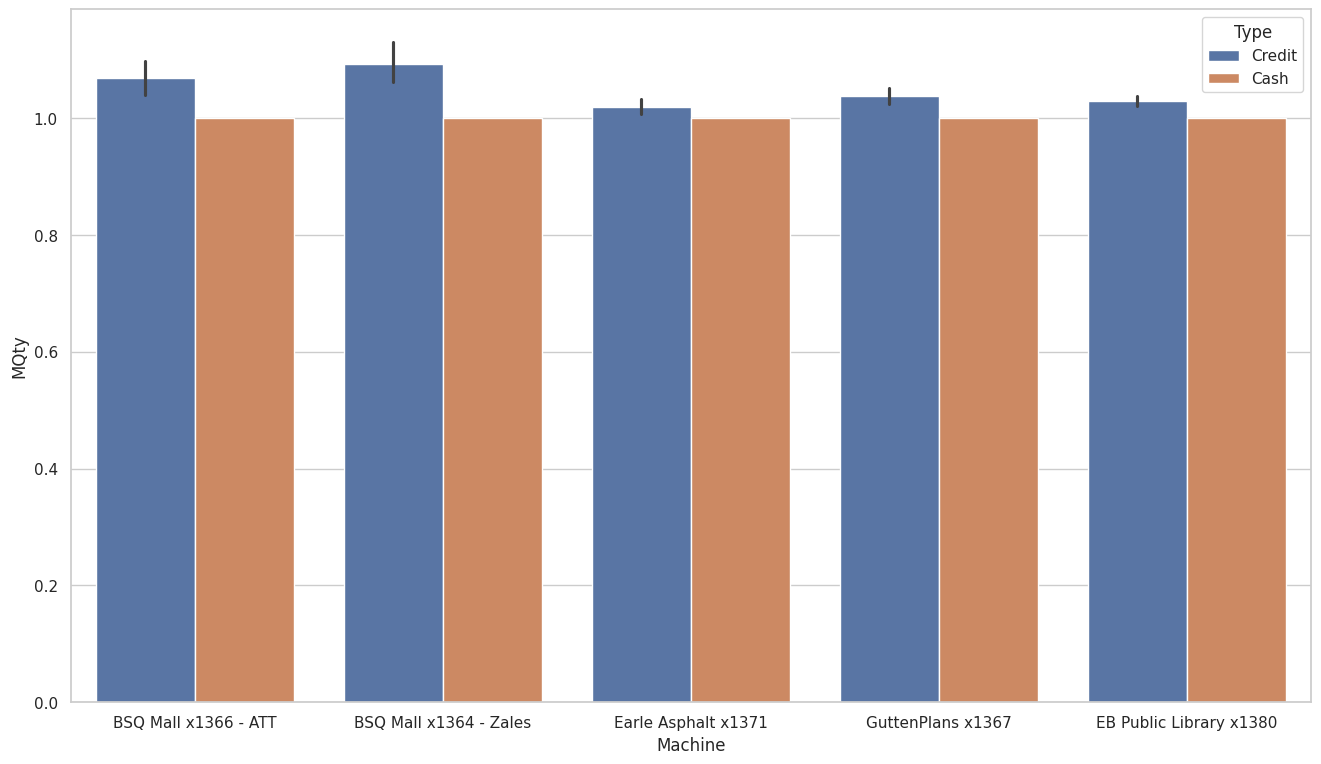

In [ ]:
#Hypothersis 3 that most people would use credit card
sns.set(rc={"figure.figsize":(16, 9)}, style="whitegrid") #width=16, #height=9
sns.barplot(not_null_rows_vending, x = 'Machine',y='MQty', hue= 'Type')

In [ ]:
#Hypothesis Correct most people use Credit Cards on average